In [52]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #helps split data evenly and randomly
from sklearn.metrics import mean_squared_error 
sb.set()

pd.options.display.max_rows = 999

*We start by importing the dataset and doing some basic exploration*

In [53]:
life=pd.read_csv("dataset/Life Expectancy Data.csv")
print("Data dimensions",life.shape)
life.head()

Data dimensions (2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


*The following is a description of dataset from kaggle*
>**1) Country**: Country <br>
>**2) Year**: Year in which the data is collected, ranges from `2010` to `2015`. A total of `15` years per country <br>
>**3) Status**: Whether country is developing or developed <br>
>**4) Life expectancy**: Life expectancy in age <br>
>**5) Adult Mortality**: ~Probability of dying~ Number of deaths between `15` and `60` years per `1000` population. Both male and female. <br>
>**6) Infant deaths**: Number of Infant Deaths per `1000` population <br>
>**7) Alcohol**: Alcohol consumption (in litres of pure alcohol), per capita (15+) <br>
>**8) Percentage Expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita`(%)` <br>
>**9) Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds `(%)` <br>
>**10) Measles**: Measles - number of reported cases per `1000` population <br>
>**11) BMI**: Average Body Mass Index of entire population <br>
>**12) under-five-deaths**: Number of under-five deaths per `1000` population <br>
>**13) Polio**: Polio (Pol3) immunization coverage among 1-year-olds `(%)` <br>
>**14) Total expenditure**: General government expenditure on health as a percentage of total government expenditure `(%)` <br>
>**15) Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds `(%)` <br>
>**16) HIV/AIDS**: Deaths per `1000` live births HIV/AIDS (0-4 years) <br>
>**17) GDP**:Gross Domestic Product per capita (in USD) <br>
>**18) Population**: Population <br>
>**19) Thinness 10-19 years**: Prevalence of thinness among children and adolescents for Age `10` to `19` `(%)` <br>
>**20) Thinness 5-9 years**:Prevalence of thinness among children for Age `5` to `9``(%)` <br>
>**21) Income composition**:Human Development Index in terms of income composition of resources (index ranging from `0` to `1`) <br>
>**22) Schooling**: Number of years of Schooling(years) <br>

In [54]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

*Observations*:
- There are 22 variables, possible response variables can be life expectancy, adult mortality, GDP or population
- Other than `country` and its development `status` being categorical, everything seems to be numeric values, with type being `int64` or `float64`
- A few variables are percentages and not numbers, like
    1. Percentage Expenditure
    2. Hepatitis B
    3. Polio
    4. Total expenditure
    5. Diphtheria
    6. Thinness 10-19 years
    7. Thinness 5-9 years

### Tidying up before EDA

Clean column names to change them all to upper case and remove any spacings

In [55]:
life.columns=life.columns.str.strip()
life.columns=life.columns.str.upper()
life.columns=life.columns.str.replace("-","_")
life.columns=life.columns.str.replace(" ","_")
life.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   COUNTRY                          2938 non-null   object 
 1   YEAR                             2938 non-null   int64  
 2   STATUS                           2938 non-null   object 
 3   LIFE_EXPECTANCY                  2928 non-null   float64
 4   ADULT_MORTALITY                  2928 non-null   float64
 5   INFANT_DEATHS                    2938 non-null   int64  
 6   ALCOHOL                          2744 non-null   float64
 7   PERCENTAGE_EXPENDITURE           2938 non-null   float64
 8   HEPATITIS_B                      2385 non-null   float64
 9   MEASLES                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  UNDER_FIVE_DEATHS                2938 non-null   int64  
 12  POLIO               

After inspection we decided to combine thinness 5-9 and 10-19(there is a typo in the dataset header, supposed to be 10-19 not 1-19)<br>
Since the thinness are percentages of non-overlapping sets, we can just add them together.

In [56]:
#life=life.drop(['ADULT_MORTALITY'],axis=1)
life['THINNESS__1_19_YEARS']=life['THINNESS__1_19_YEARS']+life['THINNESS_5_9_YEARS']
life=life.drop(['THINNESS_5_9_YEARS'],axis=1)
life.rename(columns={'THINNESS__1_19_YEARS':'THINNESS_5_to_19_YEARS'},inplace=True)
life

,COUNTRY,YEAR,STATUS,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,...,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,34.5,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,86,58.0,8.18,62.0,0.1,612.696514,327582.0,35.0,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,35.4,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,35.9,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,36.4,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,18.8,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,19.7,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,40,73.0,6.53,71.0,39.8,57.348340,125525.0,2.5,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,3.3,0.427,9.8


In [57]:
print("Number of unqiue countries in the dataset:",life["COUNTRY"].nunique())

Number of unqiue countries in the dataset: 193


In [58]:
print(life["COUNTRY"].value_counts())


Afghanistan                                             16
Peru                                                    16
Nicaragua                                               16
Niger                                                   16
Nigeria                                                 16
Norway                                                  16
Oman                                                    16
Pakistan                                                16
Panama                                                  16
Papua New Guinea                                        16
Paraguay                                                16
Philippines                                             16
Lebanon                                                 16
Poland                                                  16
Portugal                                                16
Qatar                                                   16
Republic of Korea                                       

From this we observe that there are 193 countries, and all countries except Tuvalu, Cook Islands,Marshall Islands, Monaco, Palau,Niue,San Marino,Nauru,Saint Kitts and Nevis,Dominica have 16 years worth of data

# DATA CLEANING

we start by exploring `0` values in `GDP` and `POPULATION` since they should not be `0`, `0` indicates missing values as well

In [94]:
tmp = life[(life['GDP']==0)| (life['POPULATION']==0)]
tmp

,COUNTRY,YEAR,STATUS,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,...,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING


**good news**, there are no entries with `GDP` or `POPULATION` equal to 0

We also quickly check variables that are percentages, since some also do not make sense if they are `0`
Variables based percentages are
- `PERCENTAGE_EXPENDITURE`
- `HEPATITIS_B`
- `POLIO`
- `TOTAL_EXPENDITURE`
- `DIPHTHERIA`
- `THINNESS_5_to_19_YEARS`

In [96]:
life[["PERCENTAGE_EXPENDITURE","HEPATITIS_B","POLIO","TOTAL_EXPENDITURE","DIPHTHERIA","THINNESS_5_to_19_YEARS"]].describe()

,PERCENTAGE_EXPENDITURE,HEPATITIS_B,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,THINNESS_5_to_19_YEARS
count,2938.000000,2385.000000,2919.000000,2712.00000,2919.000000,2904.000000
mean,738.251295,80.940461,82.550188,5.93819,82.324084,9.710021
std,1987.914858,25.070016,23.428046,2.49832,23.716912,8.792099
min,0.000000,1.000000,3.000000,0.37000,2.000000,0.200000
25%,4.685343,77.000000,78.000000,4.26000,78.000000,3.100000
50%,64.912906,92.000000,93.000000,5.75500,93.000000,6.800000
75%,441.534144,97.000000,97.000000,7.49250,97.000000,14.200000
max,19479.911610,99.000000,99.000000,17.60000,99.000000,56.300000


In [106]:
print("Number of 0 entries in PERCENTAGE_EXPENDITURE:", len(life[life['PERCENTAGE_EXPENDITURE']==0].index))

Number of 0 entries in PERCENTAGE_EXPENDITURE: 611


We notice that there are a lot of values in `PERCENTAGE_EXPENDITURE` with 0 values. <br>
Since it is *Percentage Expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)*, it does not make sense to be 0, thus we assume that they are actually **missing values**, and we will remove the values.

In [112]:
life['PERCENTAGE_EXPENDITURE'].replace(to_replace=0,value=np.nan,inplace=True)
print("Number of 0 entries in PERCENTAGE_EXPENDITURE:", len(life[life['PERCENTAGE_EXPENDITURE']==0].index))

Number of 0 entries in PERCENTAGE_EXPENDITURE: 0


we move on by exploring all the null values and extract them

In [113]:
life.isnull().sum()

COUNTRY                              0
YEAR                                 0
STATUS                               0
LIFE_EXPECTANCY                     10
ADULT_MORTALITY                     10
INFANT_DEATHS                        0
ALCOHOL                            194
PERCENTAGE_EXPENDITURE             611
HEPATITIS_B                        553
MEASLES                              0
BMI                                 34
UNDER_FIVE_DEATHS                    0
POLIO                               19
TOTAL_EXPENDITURE                  226
DIPHTHERIA                          19
HIV/AIDS                             0
GDP                                448
POPULATION                         652
THINNESS_5_to_19_YEARS              34
INCOME_COMPOSITION_OF_RESOURCES    167
SCHOOLING                          163
dtype: int64

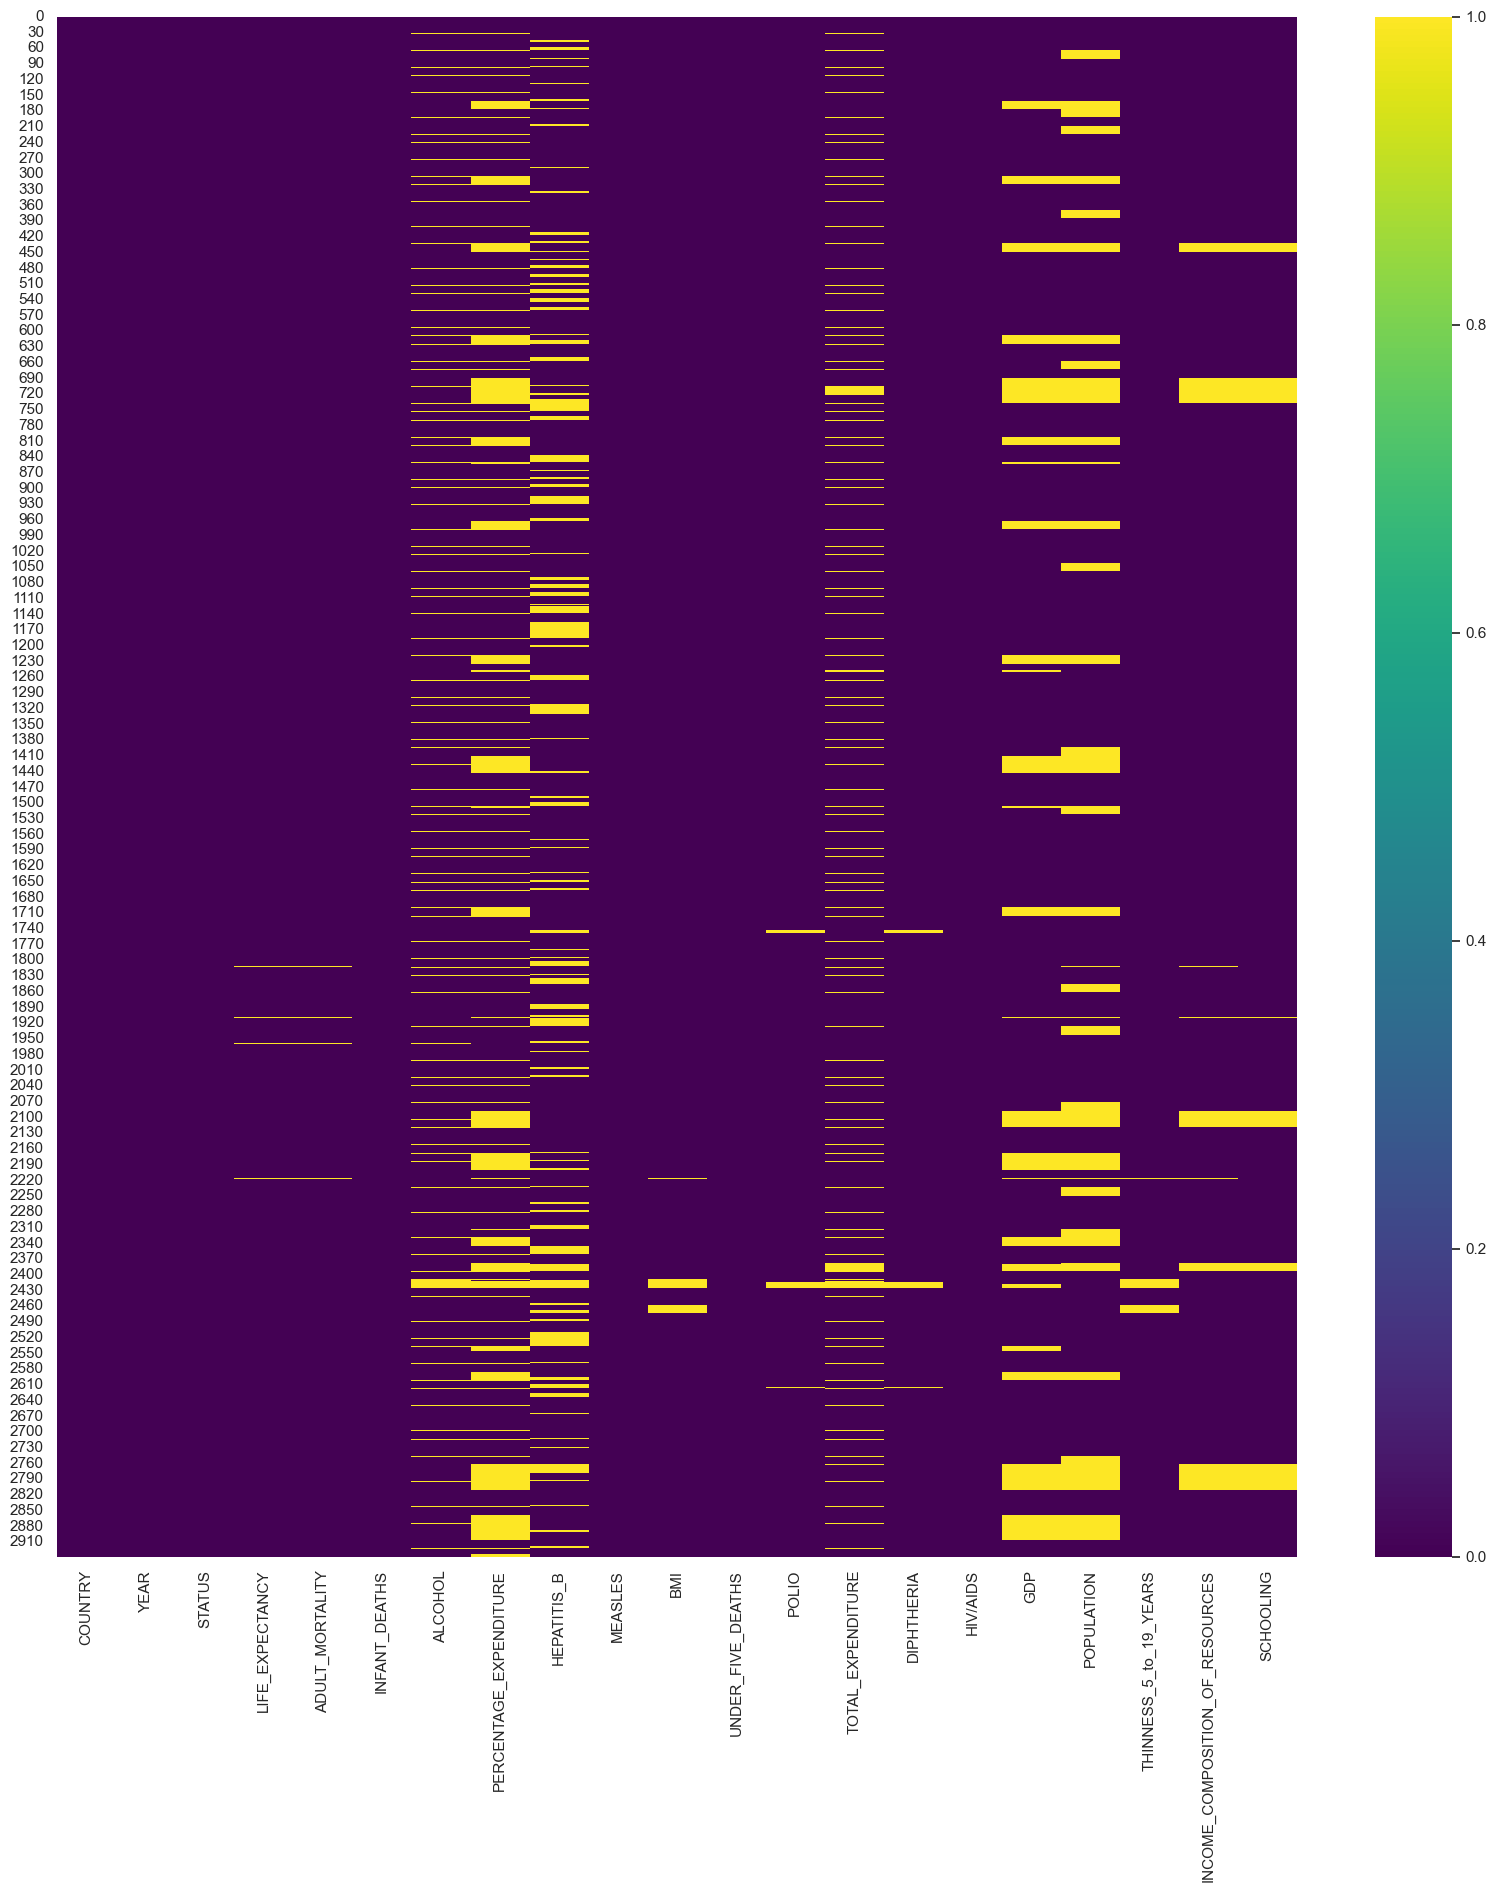

In [114]:
f=plt.figure(figsize=(20,20))
sb.heatmap(life.isnull(),cmap='viridis',cbar=True)
plt.show()

Find out for each feature, how much of it is actually missing data

In [115]:
percentage_NA={}
for var in life:
    if life[var].isna().sum() != 0:
        percentage_NA[var]=(life[var].isna().sum()/ len(life.index) ) *100

print("PERCENTAGE OF NULL/MISSING VALUES OF EACH FEATURE")
print()
for var,value in percentage_NA.items():
    print(f'{var:40}{value.round(4)}','%')
        

PERCENTAGE OF NULL/MISSING VALUES OF EACH FEATURE

LIFE_EXPECTANCY                         0.3404 %
ADULT_MORTALITY                         0.3404 %
ALCOHOL                                 6.6031 %
PERCENTAGE_EXPENDITURE                  20.7965 %
HEPATITIS_B                             18.8223 %
BMI                                     1.1572 %
POLIO                                   0.6467 %
TOTAL_EXPENDITURE                       7.6923 %
DIPHTHERIA                              0.6467 %
GDP                                     15.2485 %
POPULATION                              22.192 %
THINNESS_5_to_19_YEARS                  1.1572 %
INCOME_COMPOSITION_OF_RESOURCES         5.6841 %
SCHOOLING                               5.548 %


In [116]:
life[life.isna().any(axis=1)]

,COUNTRY,YEAR,STATUS,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,...,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
32,Algeria,2015,Developing,75.6,19.0,21,NaN,NaN,95.0,63,...,24,95.0,NaN,95.0,0.1,4132.762920,39871528.0,11.8,0.743,14.4
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,23,87.0,3.60,87.0,0.1,294.335560,3243514.0,12.4,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,23,86.0,3.73,86.0,0.1,1774.336730,3199546.0,12.5,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,24,89.0,3.84,89.0,0.1,1732.857979,31592153.0,12.7,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,25,86.0,3.49,86.0,0.1,1757.177970,3118366.0,12.9,0.636,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,NaN,68.0,31,...,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,18.8,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,NaN,7.0,998,...,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,19.7,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,NaN,73.0,304,...,40,73.0,6.53,71.0,39.8,57.348340,125525.0,2.5,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,NaN,76.0,529,...,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,3.3,0.427,9.8


Although each of the features have quite little missing data, max around `20%`, if we take out **all rows** with `at least 1 null` value, we would **remove almost half** of all our data by doing this, which is **too much** ❌❌❌

### Imputation using MICE (multivariate imputation by chained equations) 

We will do impute the missing values using scikit learn iterative imputer<br>
Reasons for using:
- the missing values from our data seems to be the type that is mostly random missing, with no clear oberservable pattern to which why they are missing
- quite a large amount of missing data for most of the features, so the method of K-nearest-neighbours would not be as good since that model's accuracy directly depends of how much of the data we have, so we decide that `Scikit-Learn`'s `IterativeImputer` would be a better choice

using MICE to do iterative imputation multiple times, each time **mutually exclusively from each other** and combining the results together

**min value of imputed values should be 0 since for every single variable in the dataset it is based on real numbers and SHOULD NOT BE NEGATIVE**

In [117]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

imputed=[]

NUMBER_OF_ITERATIONS=5

for i in range(NUMBER_OF_ITERATIONS):
    
    #remove all non-numeric data
    life_num=life.drop(['COUNTRY','STATUS'],axis=1)
    
    imputer = IterativeImputer(estimator=BayesianRidge(),
                               random_state=i, 
                               n_nearest_features=None,
                               verbose=3, 
                               imputation_order='ascending',
                               max_iter=4,
                               min_value=0,
                               sample_posterior=True)
    imputer.fit(life_num)
    life_num.iloc[:,:]=imputer.transform(life_num)
    imputed.append(life_num)

    
life_filled=pd.concat(imputed[i] for i in range(NUMBER_OF_ITERATIONS)).groupby(level=0).mean()
data=[life[['COUNTRY','STATUS']],life_filled]
life_filled=pd.concat(data,ignore_index=False,sort=False,axis=1)
life_filled

[IterativeImputer] Completing matrix with shape (2938, 19)
[IterativeImputer] Ending imputation round 1/4, elapsed time 0.11
[IterativeImputer] Ending imputation round 2/4, elapsed time 0.19
[IterativeImputer] Ending imputation round 3/4, elapsed time 0.29
[IterativeImputer] Ending imputation round 4/4, elapsed time 0.38
[IterativeImputer] Completing matrix with shape (2938, 19)
[IterativeImputer] Ending imputation round 1/4, elapsed time 0.02
[IterativeImputer] Ending imputation round 2/4, elapsed time 0.05
[IterativeImputer] Ending imputation round 3/4, elapsed time 0.08
[IterativeImputer] Ending imputation round 4/4, elapsed time 0.09
[IterativeImputer] Completing matrix with shape (2938, 19)
[IterativeImputer] Ending imputation round 1/4, elapsed time 0.10
[IterativeImputer] Ending imputation round 2/4, elapsed time 0.19
[IterativeImputer] Ending imputation round 3/4, elapsed time 0.29
[IterativeImputer] Ending imputation round 4/4, elapsed time 0.38
[IterativeImputer] Completing m

,COUNTRY,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,...,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,Afghanistan,Developing,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,34.5,0.479,10.1
1,Afghanistan,Developing,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,35.0,0.476,10.0
2,Afghanistan,Developing,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,35.4,0.470,9.9
3,Afghanistan,Developing,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,35.9,0.463,9.8
4,Afghanistan,Developing,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,36.4,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,Developing,2004.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,42.0,67.0,7.13,65.0,33.6,454.366654,12777511.0,18.8,0.407,9.2
2934,Zimbabwe,Developing,2003.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,41.0,7.0,6.52,68.0,36.7,453.351155,12633897.0,19.7,0.418,9.5
2935,Zimbabwe,Developing,2002.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,40.0,73.0,6.53,71.0,39.8,57.348340,125525.0,2.5,0.427,10.0
2936,Zimbabwe,Developing,2001.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,39.0,76.0,6.16,75.0,42.1,548.587312,12366165.0,3.3,0.427,9.8


In [118]:
life_filled.isna().sum()

COUNTRY                            0
STATUS                             0
YEAR                               0
LIFE_EXPECTANCY                    0
ADULT_MORTALITY                    0
INFANT_DEATHS                      0
ALCOHOL                            0
PERCENTAGE_EXPENDITURE             0
HEPATITIS_B                        0
MEASLES                            0
BMI                                0
UNDER_FIVE_DEATHS                  0
POLIO                              0
TOTAL_EXPENDITURE                  0
DIPHTHERIA                         0
HIV/AIDS                           0
GDP                                0
POPULATION                         0
THINNESS_5_to_19_YEARS             0
INCOME_COMPOSITION_OF_RESOURCES    0
SCHOOLING                          0
dtype: int64

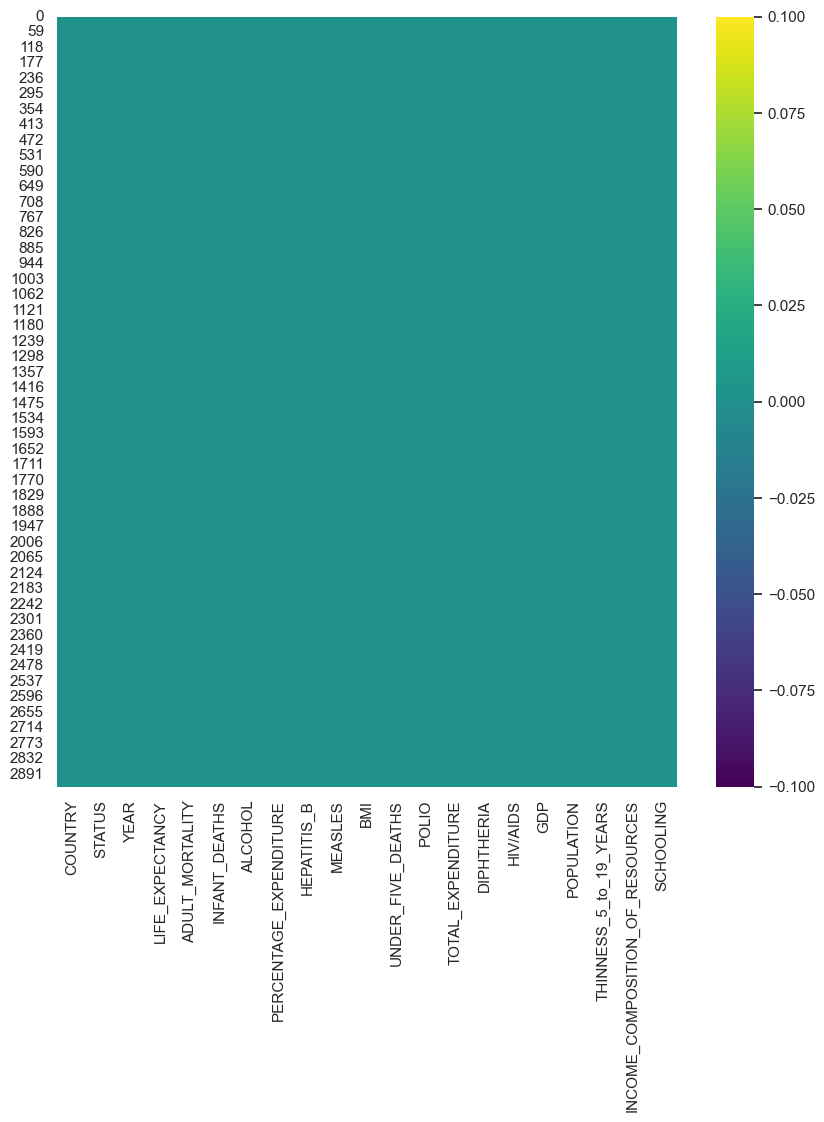

In [119]:
f=plt.figure(figsize=(10,10))
sb.heatmap(life_filled.isnull(),cmap='viridis',cbar=True)
plt.show()

as seen above the dataset **no longer has missing values**

In [120]:
#life_filled.to_csv("dataset/life_filled.csv")

# BASIC EDA

We will create a aggregated row **using MEAN** for each country over the years, by removing the year variable for ease of comparison between countries, call it life_agg, just for EDA

In [121]:
unique_countries=pd.Series(life_filled["COUNTRY"].unique())
life_agg=life_filled[0:0] #empty new dataframe with only header
for country in unique_countries:
    extract=life_filled[life_filled["COUNTRY"]==country]
    newrow={}
    for col in extract.columns:
        if extract[col].dtype != 'object' and col != 'YEAR':
            newrow[col]=extract[col].mean()
        else:
            newrow[col]=extract[col].unique() #just take out the first row, the name of the country, since all rows the same
    newrow=pd.DataFrame(newrow,index=range(16))
    life_agg=pd.concat([life_agg,pd.DataFrame(newrow.iloc[[0]])])
life_agg=life_agg.drop(['YEAR'],axis=1) #remove the year column
life_agg.index=range(193)
life_agg

,COUNTRY,STATUS,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,Afghanistan,Developing,58.193750,269.062500,78.2500,0.014375,34.960110,64.562500,2362.2500,15.518750,107.5625,48.375000,8.252500,52.312500,0.10000,340.015425,9.972260e+06,32.162500,0.415375,8.212500
1,Albania,Developing,75.156250,45.062500,0.6875,4.848750,193.259091,98.000000,53.3750,49.068750,0.9375,98.125000,5.945625,98.062500,0.10000,2119.726679,6.969116e+05,3.318750,0.709875,12.137500
2,Algeria,Developing,73.618750,108.187500,20.3125,1.849857,308.921797,94.415542,1943.8750,48.743750,23.5000,91.750000,6.128857,91.875000,0.10000,2847.853392,2.164983e+07,12.068750,0.694875,12.712500
3,Angola,Developing,49.018750,328.562500,83.7500,6.250518,157.637307,84.353501,3561.3125,18.018750,132.6250,46.125000,4.445498,47.687500,2.36875,1975.143045,1.014710e+07,12.862500,0.458375,8.043750
4,Antigua and Barbuda,Developing,75.056250,127.500000,0.0000,8.661503,1129.055259,98.769701,0.0000,38.425000,0.0000,96.937500,5.446574,98.312500,0.12500,9759.305728,2.238322e+08,6.800000,0.488625,8.843750
5,Argentina,Developing,75.156250,106.000000,10.1250,8.503112,876.740596,98.130805,2.0000,54.981250,11.3750,93.375000,7.927945,92.375000,0.10000,6998.575103,2.012120e+07,2.025000,0.794125,16.506250
6,Armenia,Developing,73.400000,117.375000,1.0000,5.434691,131.007419,87.562500,274.2500,44.706250,1.0000,89.125000,5.481402,87.375000,0.10000,1999.986318,1.015165e+06,4.150000,0.698375,11.787500
7,Australia,Developed,81.812500,63.187500,1.0000,11.815227,5823.966933,96.140418,103.9375,55.862500,1.3750,86.750000,9.146743,86.875000,0.10000,34637.565047,4.587010e+06,1.293750,0.918125,20.037500
8,Austria,Developed,81.481250,65.750000,0.0000,12.445564,5334.827754,81.062500,77.2500,48.287500,0.0000,86.000000,6.441630,86.750000,0.10000,33827.476309,6.474880e+06,3.668750,0.862375,15.387500
9,Azerbaijan,Developing,70.731250,115.187500,6.0625,1.277713,131.148747,71.483904,598.1875,43.843750,7.1875,75.812500,6.996858,82.312500,0.10000,3302.947807,2.157370e+06,5.843750,0.702687,11.350000


now we do some basic EDA

### Categorial variables

we shall explore categorial variables seperately from numeric data

In [122]:
life_agg.select_dtypes(include="object").describe()

,COUNTRY,STATUS
count,193,193
unique,193,2
top,Afghanistan,Developing
freq,1,161


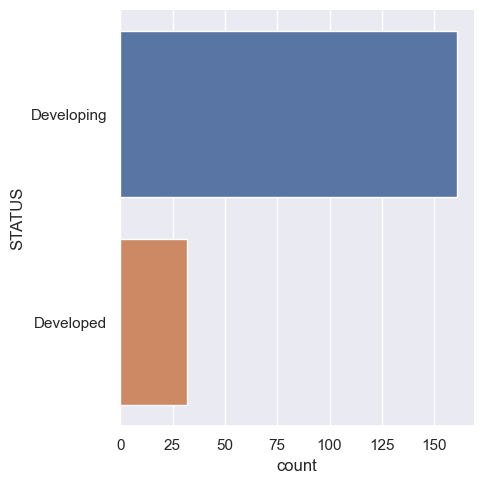

In [123]:
sb.catplot(y='STATUS',data=life_agg,kind="count")

- From here we confirm that there are indeed `193` unique countries
- For the status, most, `161` are Developing countries, with only `193 - 161 = 32` Developed countries
- The ratio of developed to developing countries is **highly imbalanced**, so **classification models may have problems** unless we fix this

### Numeric variables based on percentages

now we explore numeric variables, we seperate out those based on percentages vs those with actual quantities

In [126]:
life_agg[["PERCENTAGE_EXPENDITURE","HEPATITIS_B","POLIO","TOTAL_EXPENDITURE","DIPHTHERIA","THINNESS_5_to_19_YEARS"]].describe()



,PERCENTAGE_EXPENDITURE,HEPATITIS_B,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,THINNESS_5_to_19_YEARS
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,2160.033872,95.375175,83.148279,7.026587,83.082865,9.851180
std,3060.096968,26.413829,16.936960,2.407708,17.930970,8.854402
min,11.419555,8.000000,9.000000,2.464623,9.000000,0.200000
25%,141.999816,82.875000,72.500000,5.580000,72.625000,3.356250
50%,466.924705,95.062500,88.312500,6.755305,88.812500,7.275000
75%,2944.170233,99.197865,96.125000,8.143665,96.187500,14.256250
max,11092.909868,187.934403,129.088110,18.673332,150.599128,55.043750


Remarks:
- We are **not sure** why `PERCENTAGE_EXPENDITURE` on average is higher than `100%`, even though the data mentioned that it is based on 100% ❓❓❓❓
- `HEPATITIS_B` immunization rates are quite high across all countries with the mean and median both around `80%`
- similarly for `POLIO` immunization rates it is also quite high at around `80-90%`
- For `TOTAL_EXPENDITURE` as percentage of government expenditure it is around 6% devoted to healthcare on average
- For `DIPHTHERIA` it is also a measure of immunization rates so it is also around `80-90%` on average
- For combined `THINNESS_5_to_19_YEARS` the mean `9.66%` is noticeably higher than median `7.27%` so the distribution is probably positively skewed

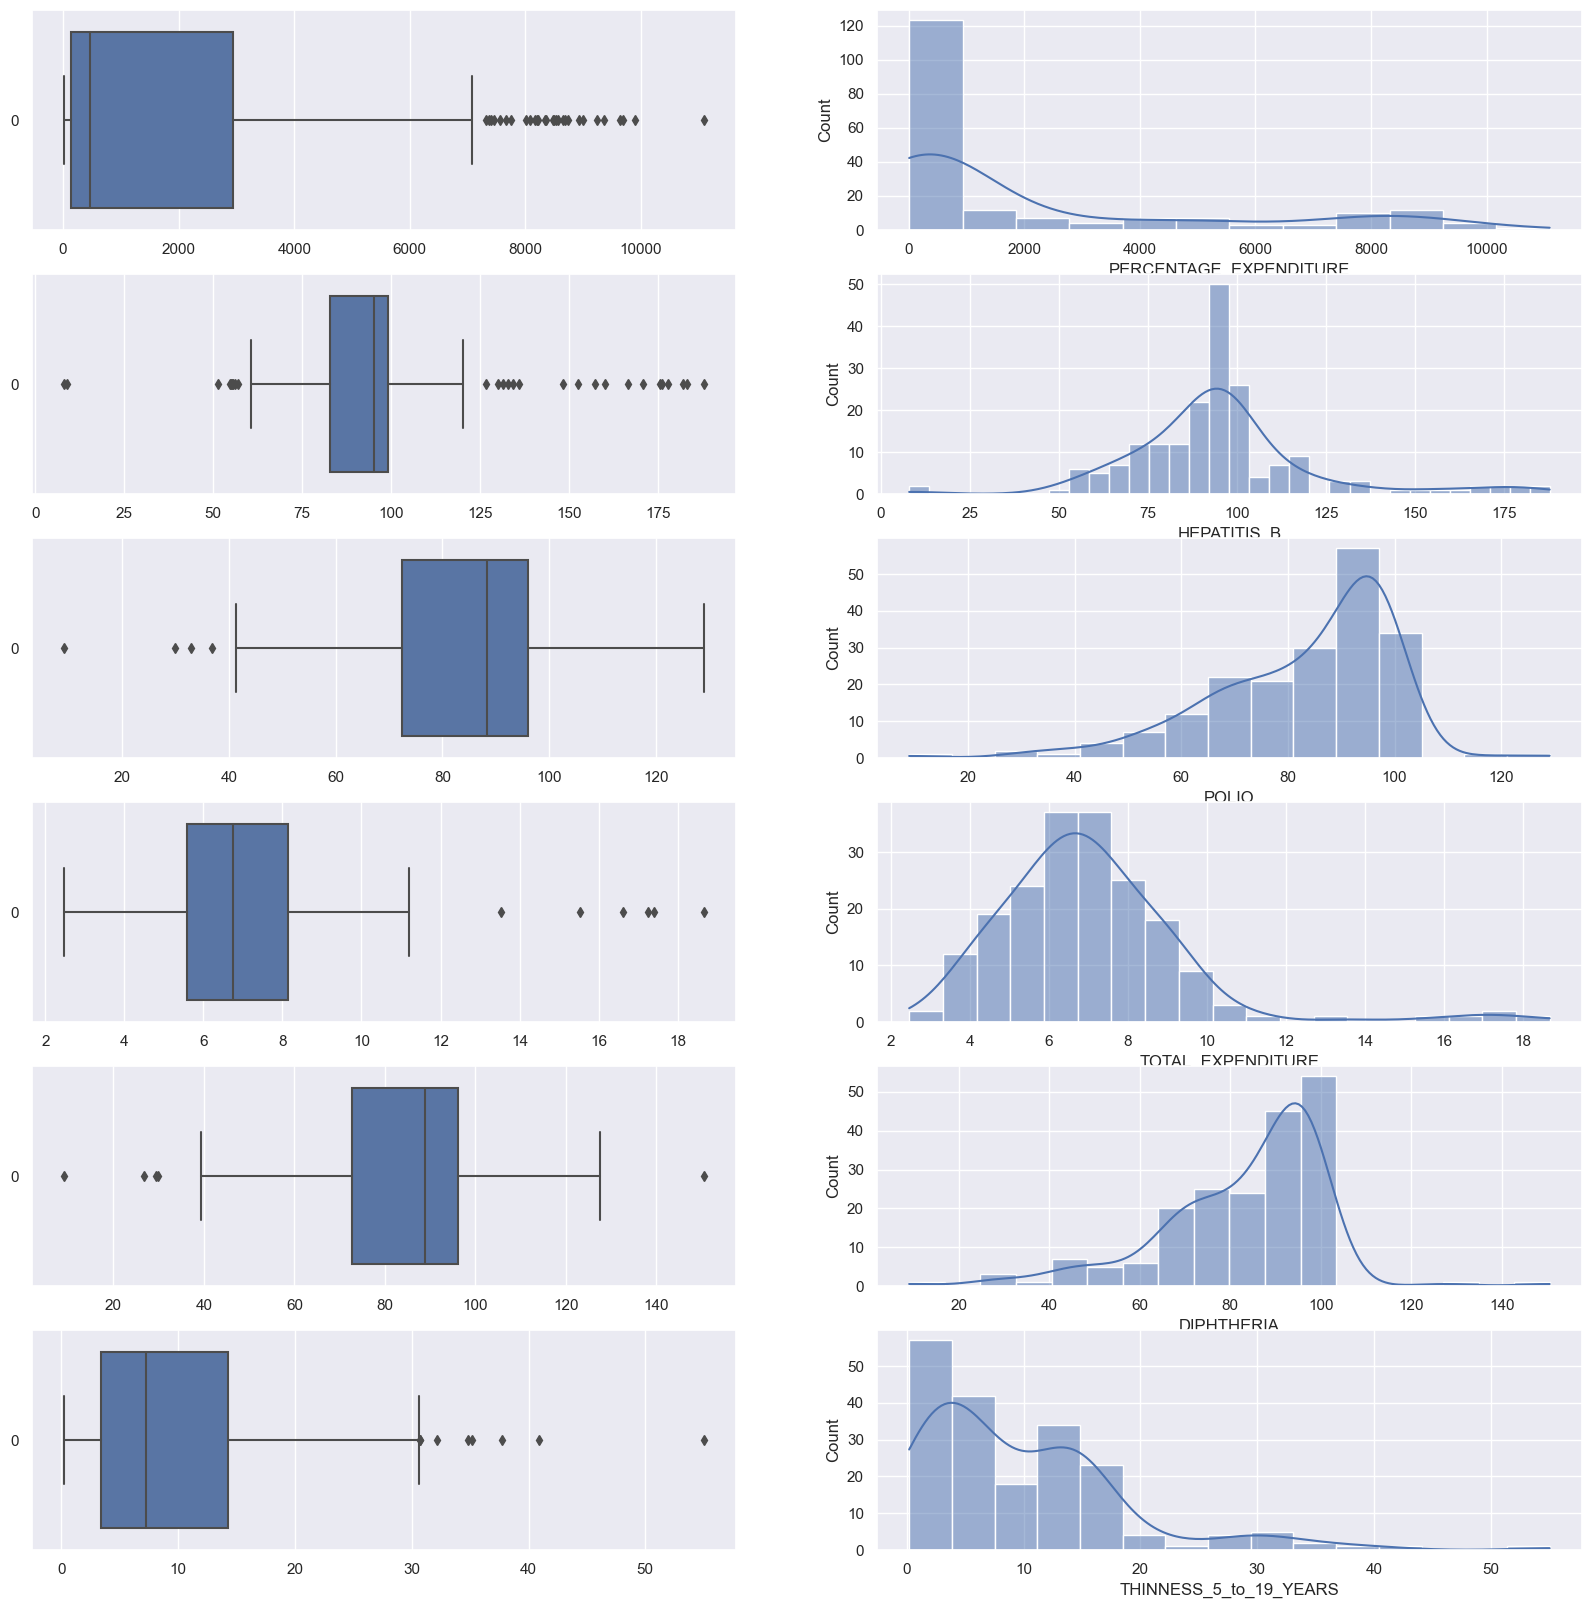

In [125]:
f, axes = plt.subplots(6, 2, figsize=(20, 20))
tmp=life_agg[["PERCENTAGE_EXPENDITURE","HEPATITIS_B","POLIO","TOTAL_EXPENDITURE","DIPHTHERIA","THINNESS_5_to_19_YEARS"]]

count = 0
for var in tmp:
    sb.boxplot(data = life_agg[var], orient = "h", ax = axes[count,0])
    sb.histplot(data=life_agg[var], ax=axes[count,1],kde=True)
    count += 1

- We only notice some potential problems for `PERCENTAGE_EXPENDITURE`, which is contains large number of very low values and some very high values, the distribution is extremely wide, needs further exploration
- for `THINNESS_5_to_19_YEARS` the distribution is bimodal, with a lot of countries having very low percentages and another peak at 15%

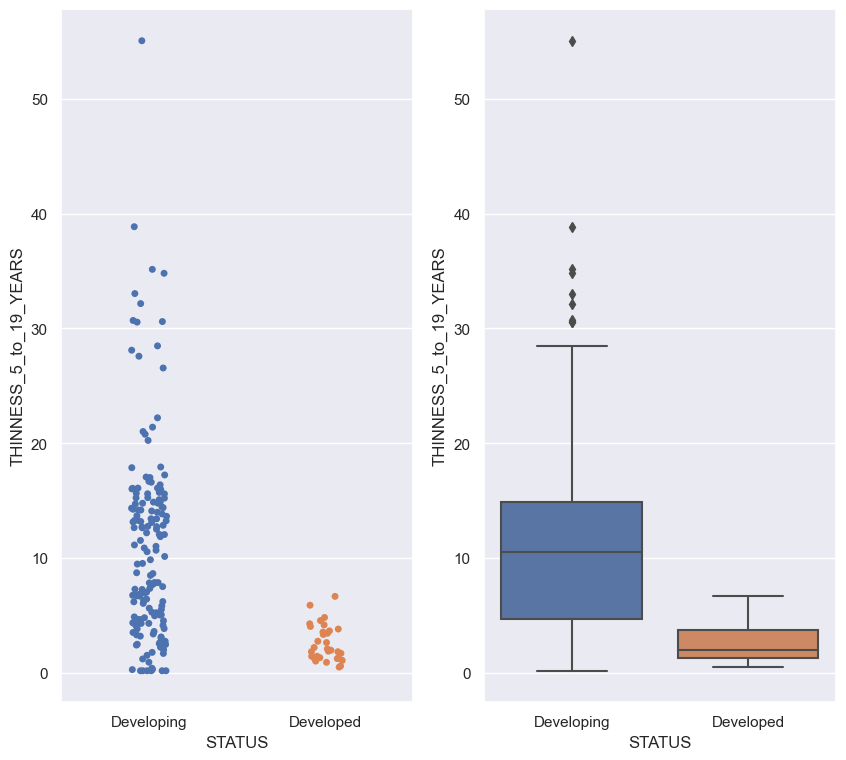

In [73]:
f, axes = plt.subplots(1, 2, figsize=(10, 9))
sb.stripplot(x = 'STATUS', y = 'THINNESS_5_to_19_YEARS', data = life_agg,ax=axes[0])
sb.boxplot(x = 'STATUS', y = 'THINNESS_5_to_19_YEARS', data = life_agg,ax=axes[1])
plt.show()

After seperating out the `THINNESS_5_to_19_YEARS` into developing vs developed it becomes a lot more clear, the percentage of `THINNESS_5_to_19_YEARS` in developed countries is **significantly lower** at around `2-3%`, where for developing countries it is more around `10%` which is consistent with what we expected

<AxesSubplot:>

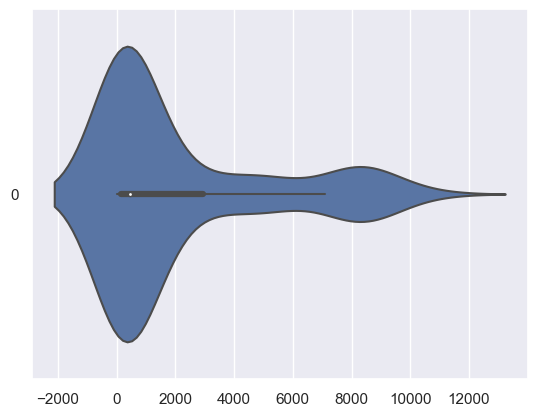

In [129]:
sb.violinplot(data=life_agg['PERCENTAGE_EXPENDITURE'],orient='h')

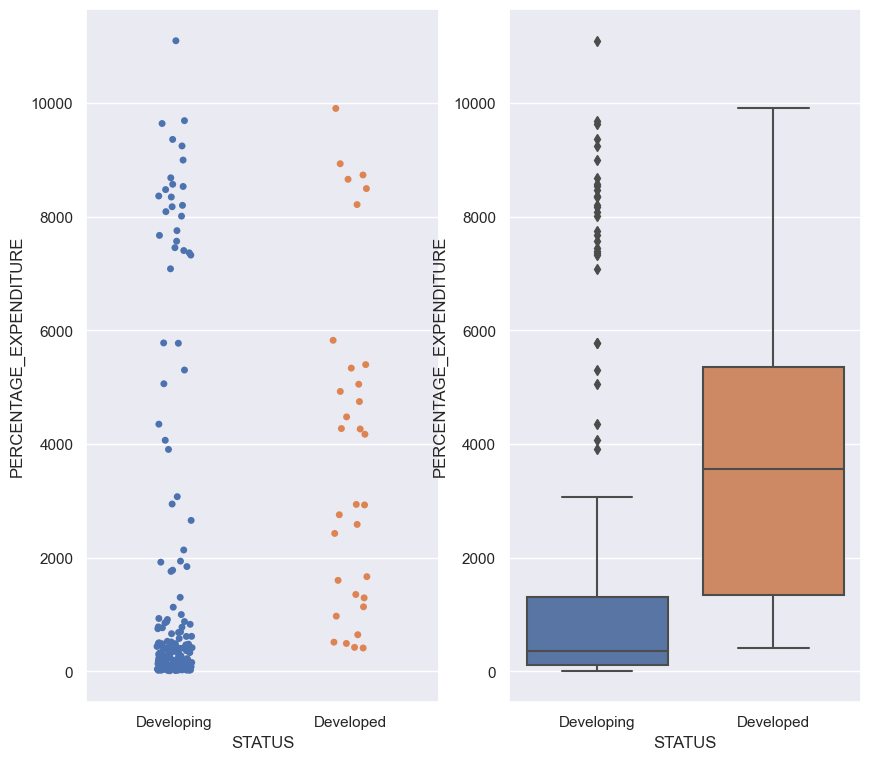

In [130]:
f, axes = plt.subplots(1, 2, figsize=(10, 9))
sb.stripplot(x = 'STATUS', y = 'PERCENTAGE_EXPENDITURE', data = life_agg,ax=axes[0])
sb.boxplot(x = 'STATUS', y = 'PERCENTAGE_EXPENDITURE', data = life_agg,ax=axes[1])
plt.show()

once again the distribution of `PERCENTAGE_EXPENDITURE` is extremely wide. It is bimodal and has a huge number of very high low percentages and very high percentages. Among `Developing` countries most have very low `PERCENTAGE_EXPENDITURE` but it varys widely, as seen by the large number of outliers. For `Developed` countries they have a `much PERCENTAGE_EXPENDITURE` as expected, although the spread is still wide.

### The rest of Numeric variables

In [131]:
life_agg[["SCHOOLING","INCOME_COMPOSITION_OF_RESOURCES","POPULATION","GDP","HIV/AIDS","UNDER_FIVE_DEATHS","BMI","MEASLES","ALCOHOL","INFANT_DEATHS","ADULT_MORTALITY","LIFE_EXPECTANCY"]].describe()

,SCHOOLING,INCOME_COMPOSITION_OF_RESOURCES,POPULATION,GDP,HIV/AIDS,UNDER_FIVE_DEATHS,BMI,MEASLES,ALCOHOL,INFANT_DEATHS,ADULT_MORTALITY,LIFE_EXPECTANCY
count,193.000000,193.000000,1.930000e+02,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,12.474716,0.673093,7.680758e+07,16485.503377,1.662338,39.993847,40.495903,2302.060233,5.682393,28.831930,186.214601,69.207015
std,3.918900,0.251474,1.193282e+08,22231.244670,4.345711,153.559716,19.009695,7886.208390,3.866602,113.136586,141.253996,9.454660
min,0.000000,0.131687,2.920000e+02,136.183210,0.100000,0.000000,5.200000,0.000000,0.010000,0.000000,18.750000,46.112500
25%,10.087500,0.488625,1.550208e+06,1397.136107,0.100000,0.000000,21.325000,3.312500,2.223230,0.000000,89.000000,62.243750
50%,12.562500,0.685825,6.700263e+06,4696.192379,0.100000,3.250000,44.706250,130.625000,4.988298,2.562500,152.062500,72.375000
75%,14.693750,0.803312,1.165553e+08,25268.649758,0.818750,24.875000,52.925000,1497.187500,8.560238,20.750000,230.250000,75.156250
max,24.624151,1.482639,5.002127e+08,80595.063094,32.943750,1812.500000,129.443853,65857.937500,15.262572,1366.687500,981.426620,89.990497


- for `SCHOOLING` both the mean and the median is around `12` years, which is a reasonable number
- for `INCOME_COMPOSITION_OF_RESOURCES` both the mean and the median is around `0.67`
- for `POPULATION` the average population of a country from this dataset is around `7million`
- for `GDP` the distribution seems very uneven and highly skewed, with the mean being significantly higher than median
- for `HIV/AIDS` it also seems very uneven and highly skewed, with the mean being significantly higher than median, this makes sense as a few countries are very heavily affected by `HIV/AIDS`.
- for `UNDER_FIVE_DEATHS` distribution seems very uneven and highly skewed, probably for the same reasons as `HIV/AIDS`
- for `MEASLES` distribution seems very uneven and highly skewed, probably for the same reasons as above
- for `ALCOHOL` both the mean and the median is around `5` liters per year per capita, which seems like a reasonable number
- for `INFANT_DEATHS`the distribution seems very skewed, with the mean being significantly higher than median
- for `ADULT_MORTALITY` the distribution seems quite skewed, with the mean being much higher than median, but all are reasonable, considering it measures number of deaths between 15 and 60 years of age per 1000 population
- for `LIFE_EXPECTANCY` with average of around `70` years of age which is reasonable

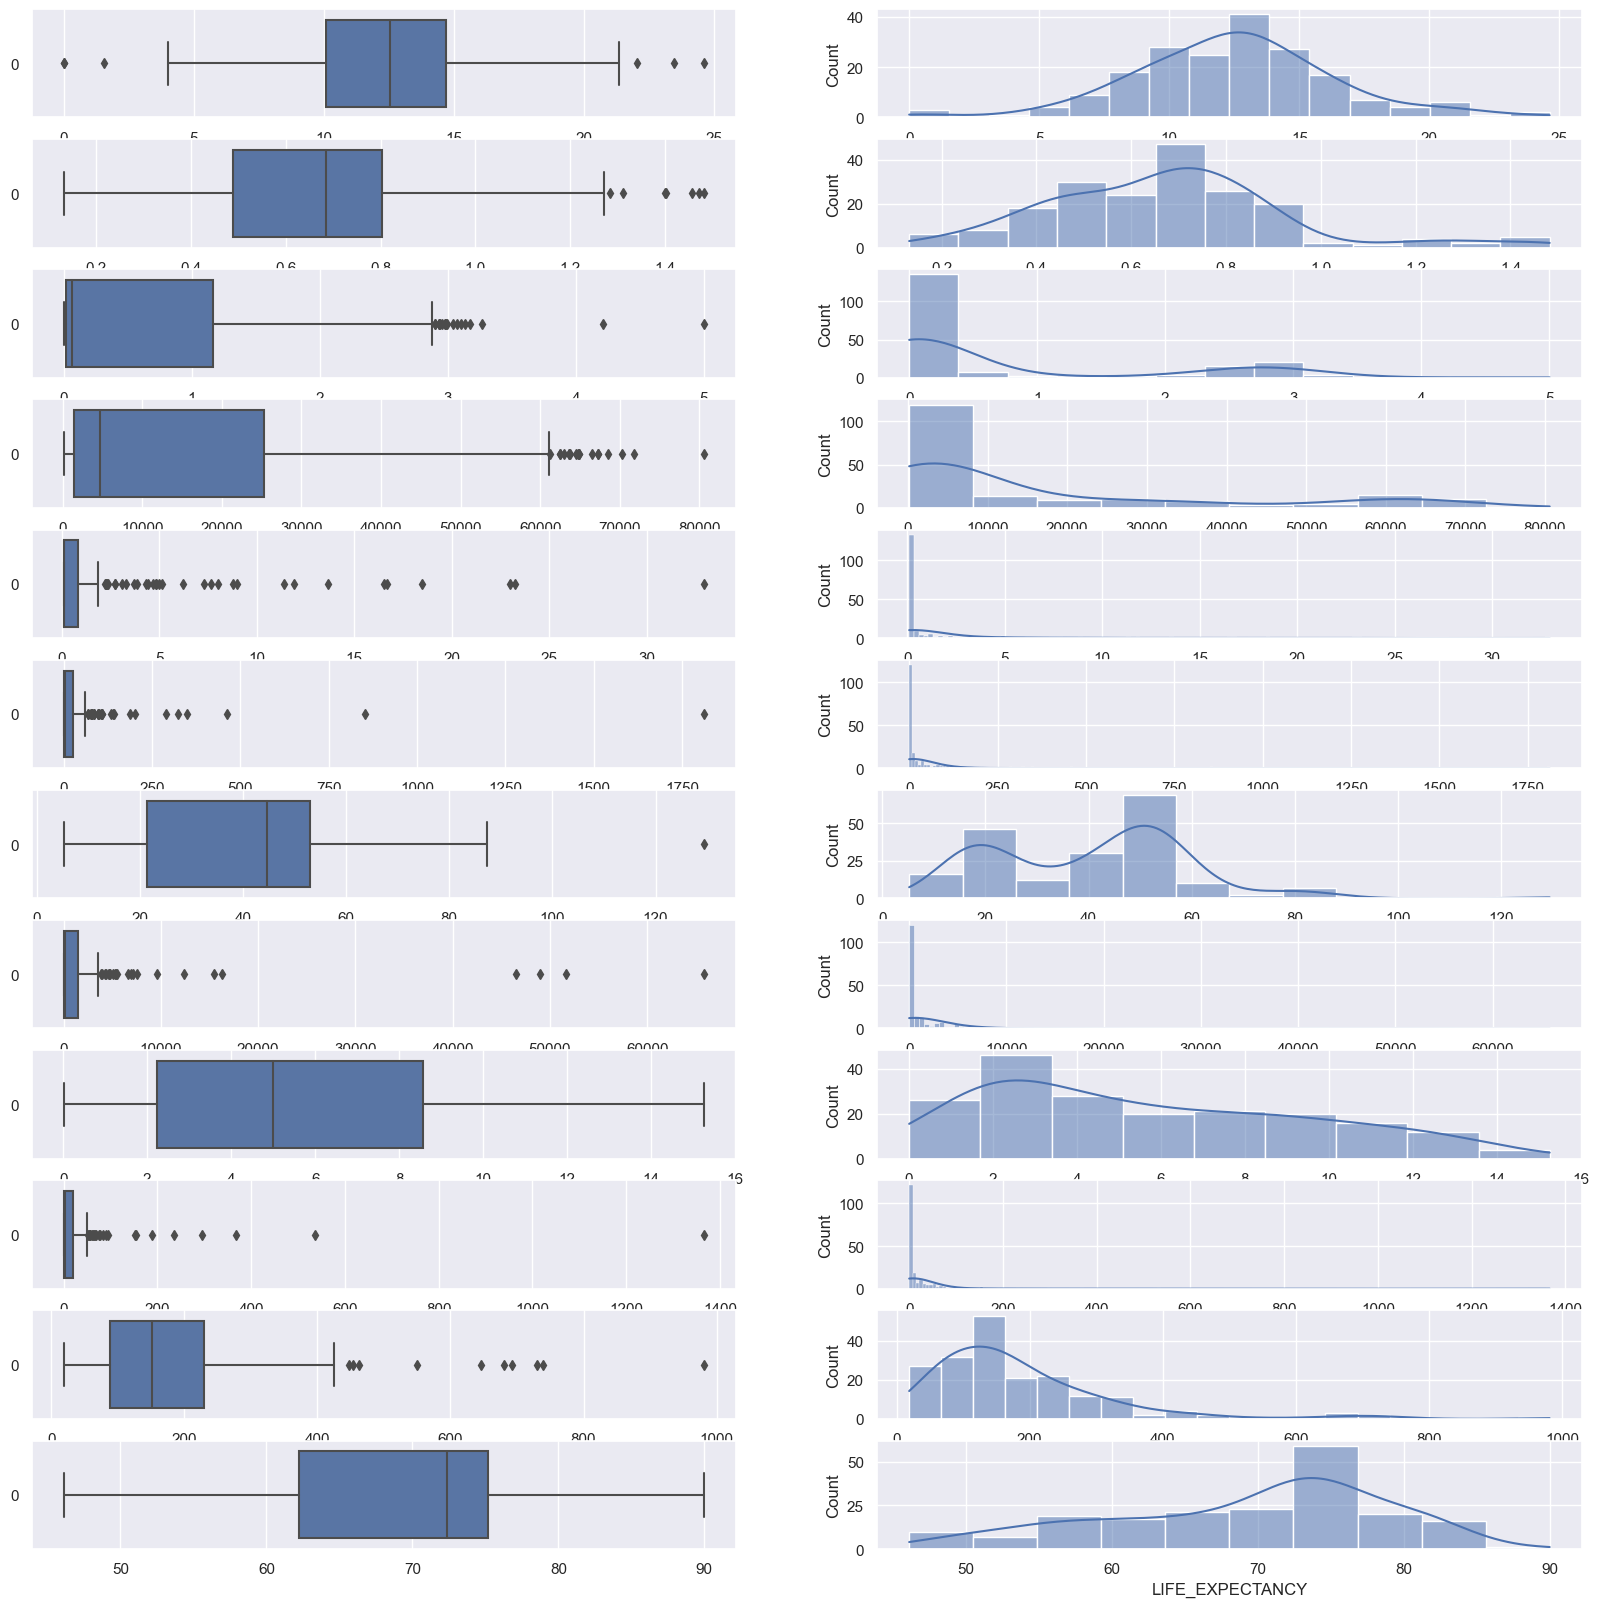

In [148]:
f, axes = plt.subplots(12, 2, figsize=(20, 20))
tmp=life_agg[["SCHOOLING","INCOME_COMPOSITION_OF_RESOURCES","POPULATION","GDP","HIV/AIDS","UNDER_FIVE_DEATHS","BMI","MEASLES","ALCOHOL","INFANT_DEATHS","ADULT_MORTALITY","LIFE_EXPECTANCY"]]

count = 0
for var in tmp:
    sb.boxplot(data = life_agg[var], orient = "h", ax = axes[count,0])
    sb.histplot(data=life_agg[var], ax=axes[count,1],kde=True)
    count += 1

After looking at distributions for many of the highly skewed features like `POPULATION`, `GDP`, as well as the illness and disease related `MEASLES`, `HIV/AIDS`, `INFANT_DEATHS`, `UNDER_FIVE_DEATHS` are expectedly highly skewed, as this highlights the **major disparity** between healthcare standards and illness rates between some of the most improvished nations and the most developed nations. However we will need to **take note of these uneven distributions during our machine learning.**

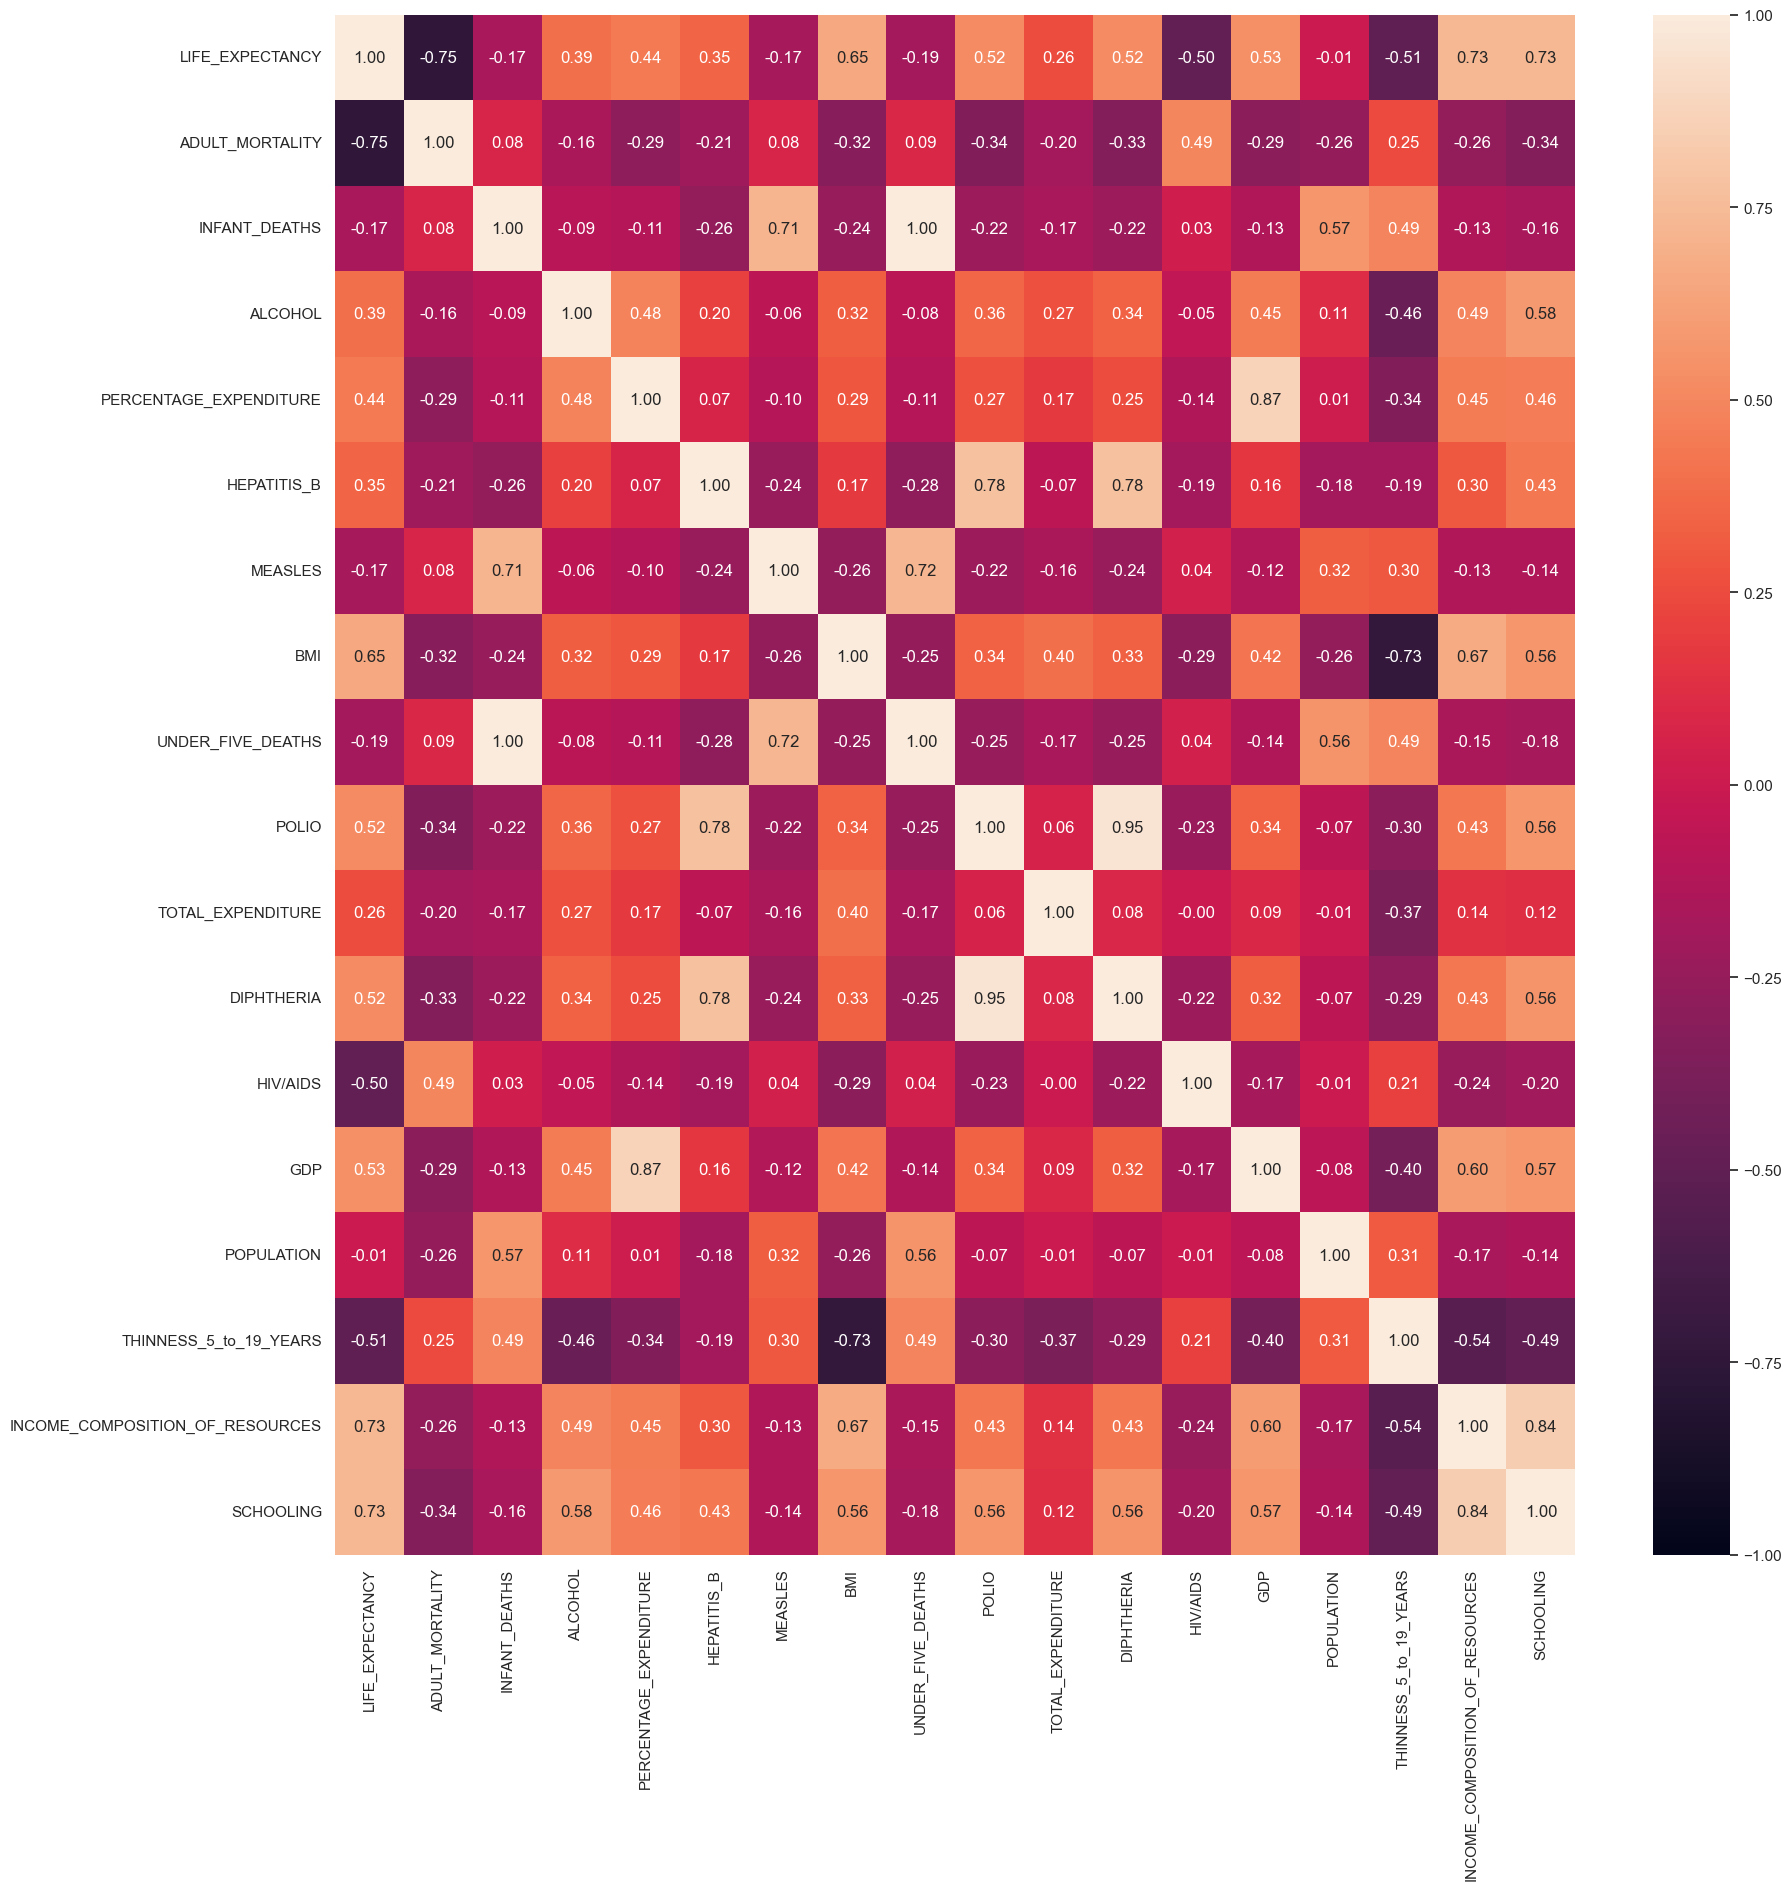

In [38]:
f = plt.figure(figsize=(20, 20))
sb.heatmap(life_agg.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [21]:
life2

,COUNTRY,STATUS,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,Afghanistan,Developing,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.375000,8.252500,52.312500,0.10000,340.015425,9.972260e+06,32.16250,0.415375,8.21250
1,Albania,Developing,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.125000,5.945625,98.062500,0.10000,2119.726679,6.969116e+05,3.31875,0.709875,12.13750
2,Algeria,Developing,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.750000,4.604000,91.875000,0.10000,2847.853392,2.164983e+07,12.06875,0.694875,12.71250
3,Angola,Developing,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.125000,3.919333,47.687500,2.36875,1975.143045,1.014710e+07,12.86250,0.458375,8.04375
4,Antigua and Barbuda,Developing,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.937500,4.791333,98.312500,0.12500,9759.305728,NaN,6.80000,0.488625,8.84375
5,Argentina,Developing,75.15625,106.0000,10.1250,7.966667,773.038981,81.285714,2.0000,54.98125,11.3750,93.375000,6.912667,92.375000,0.10000,6998.575103,2.012120e+07,2.02500,0.794125,16.50625
6,Armenia,Developing,73.40000,117.3750,1.0000,3.702667,131.007419,87.562500,274.2500,44.70625,1.0000,89.125000,4.861333,87.375000,0.10000,1999.986318,1.015165e+06,4.15000,0.698375,11.78750
7,Australia,Developed,81.81250,63.1875,1.0000,10.155333,5332.226473,93.400000,103.9375,55.86250,1.3750,86.750000,8.836667,86.875000,0.10000,34637.565047,4.587010e+06,1.29375,0.918125,20.03750
8,Austria,Developed,81.48125,65.7500,0.0000,12.236000,4928.439188,81.062500,77.2500,48.28750,0.0000,86.000000,4.715333,86.750000,0.10000,33827.476309,6.474880e+06,3.66875,0.862375,15.38750
9,Azerbaijan,Developing,70.73125,115.1875,6.0625,0.992000,131.148747,59.214286,598.1875,43.84375,7.1875,75.812500,5.679333,82.312500,0.10000,3302.947807,2.157370e+06,5.84375,0.702687,11.35000


In [22]:
life2.describe()

,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
count,183.000000,183.000000,193.000000,191.000000,193.000000,184.000000,193.000000,189.000000,193.000000,193.000000,191.000000,193.000000,193.000000,163.000000,1.450000e+02,189.000000,176.000000,180.000000
mean,69.224932,164.796448,28.831930,4.439915,708.811674,78.518282,2302.060233,39.554530,39.993847,82.430450,6.028265,82.228442,1.662338,7223.452050,1.257006e+07,9.393651,0.629502,11.894097
std,9.186432,96.185159,113.136586,3.879682,1449.445611,18.821051,7886.208390,17.602749,153.559716,16.711678,2.211023,17.186686,4.345711,10684.400474,3.816094e+07,8.248445,0.182839,3.336288
min,46.112500,18.750000,0.000000,0.010000,0.000000,8.000000,0.000000,5.200000,0.000000,9.000000,1.646667,9.000000,0.100000,136.183210,2.920000e+02,0.200000,0.131687,0.000000
25%,62.475000,80.406250,0.000000,0.969667,26.120391,67.451923,3.312500,20.925000,0.000000,71.750000,4.675000,72.375000,0.100000,798.217697,9.036317e+05,3.318750,0.480859,9.943750
50%,72.487500,146.562500,2.562500,3.505333,139.156838,83.230769,130.625000,43.906250,3.250000,88.000000,5.962000,88.187500,0.100000,2928.543542,3.608280e+06,6.968750,0.661156,12.334375
75%,75.106250,219.593750,20.750000,7.443000,508.494033,94.562500,1497.187500,52.356250,24.875000,96.000000,7.080000,96.000000,0.818750,7681.529608,1.014710e+07,14.106250,0.763375,14.068750
max,82.537500,550.062500,1366.687500,13.497333,9801.810377,99.000000,65857.937500,87.300000,1812.500000,99.000000,17.240000,99.000000,32.943750,57362.874601,4.214677e+08,55.043750,0.931437,20.037500


In [29]:
life2.dropna(inplace=True)


In [36]:
scaler= StandardScaler()

In [37]:
life2

,COUNTRY,STATUS,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,Afghanistan,Developing,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.375000,8.252500,52.312500,0.10000,340.015425,9.972260e+06,32.16250,0.415375,8.21250
1,Albania,Developing,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.125000,5.945625,98.062500,0.10000,2119.726679,6.969116e+05,3.31875,0.709875,12.13750
2,Algeria,Developing,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.750000,4.604000,91.875000,0.10000,2847.853392,2.164983e+07,12.06875,0.694875,12.71250
3,Angola,Developing,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.125000,3.919333,47.687500,2.36875,1975.143045,1.014710e+07,12.86250,0.458375,8.04375
5,Argentina,Developing,75.15625,106.0000,10.1250,7.966667,773.038981,81.285714,2.0000,54.98125,11.3750,93.375000,6.912667,92.375000,0.10000,6998.575103,2.012120e+07,2.02500,0.794125,16.50625
6,Armenia,Developing,73.40000,117.3750,1.0000,3.702667,131.007419,87.562500,274.2500,44.70625,1.0000,89.125000,4.861333,87.375000,0.10000,1999.986318,1.015165e+06,4.15000,0.698375,11.78750
7,Australia,Developed,81.81250,63.1875,1.0000,10.155333,5332.226473,93.400000,103.9375,55.86250,1.3750,86.750000,8.836667,86.875000,0.10000,34637.565047,4.587010e+06,1.29375,0.918125,20.03750
8,Austria,Developed,81.48125,65.7500,0.0000,12.236000,4928.439188,81.062500,77.2500,48.28750,0.0000,86.000000,4.715333,86.750000,0.10000,33827.476309,6.474880e+06,3.66875,0.862375,15.38750
9,Azerbaijan,Developing,70.73125,115.1875,6.0625,0.992000,131.148747,59.214286,598.1875,43.84375,7.1875,75.812500,5.679333,82.312500,0.10000,3302.947807,2.157370e+06,5.84375,0.702687,11.35000
12,Bangladesh,Developing,69.30000,141.3750,153.6250,0.010000,32.320972,77.615385,4649.9375,12.87500,201.5625,87.500000,2.854667,92.750000,0.10000,443.561481,4.298516e+07,28.10625,0.517875,8.69375


In [38]:
life2.describe()

,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,1.330000e+02,133.000000,133.000000,133.000000
mean,68.139709,174.300282,35.902726,4.436893,640.072009,77.272061,2657.467105,36.691964,49.817199,80.572006,5.888411,80.699919,2.173637,5408.637801,1.340066e+07,10.285432,0.607481,11.691823
std,9.254200,97.065845,133.819254,3.736886,1281.694179,17.174868,8473.612218,15.971021,181.414641,15.732438,1.678623,16.431339,5.080561,8750.957195,3.972571e+07,8.720758,0.178496,3.006460
min,46.112500,18.750000,0.000000,0.010000,6.436069,9.000000,0.000000,12.875000,0.000000,32.875000,1.646667,26.812500,0.100000,137.815321,3.334250e+03,0.200000,0.183875,4.018750
25%,60.862500,114.312500,0.687500,1.074667,47.731458,66.500000,15.125000,19.293750,1.000000,69.625000,4.710667,70.500000,0.100000,716.770068,1.007302e+06,3.668750,0.466187,9.868750
50%,70.731250,154.312500,3.312500,3.807333,192.115635,79.600000,251.937500,39.743750,4.000000,84.375000,5.945625,84.500000,0.106250,2158.280869,3.735507e+06,7.756250,0.638625,12.000000
75%,74.262500,227.750000,23.250000,7.130000,465.327496,91.812500,1880.812500,50.893750,35.562500,94.812500,7.052000,95.000000,1.237500,5179.256189,1.124072e+07,14.437500,0.741688,13.725000
max,82.518750,550.062500,1366.687500,13.497333,8177.576341,98.875000,65857.937500,69.431250,1812.500000,98.562500,9.932667,98.937500,32.943750,53257.012741,4.214677e+08,55.043750,0.918125,20.037500


In [52]:
life2[['LIFE_EXPECTANCY_T','ADULT_MORTALITY_T','INFANT_DEATHS_T','ALCOHOL_T','PERCENTAGE_EXPENDITURE_T','HEPATITIS_B_T','MEASLES_T','BMI_T','UNDER_FIVE_DEATHS_T','POLIO_T','TOTAL_EXPENDITURE_T','DIPHTHERIA_T','HIV/AIDS_T','GDP_T','POPULATION_T','THINNESS_5_to_19_YEARS_T','INCOME_COMPOSITION_OF_RESOURCES_T','SCHOOLING_T']]=scaler.fit_transform(life2[['LIFE_EXPECTANCY','ADULT_MORTALITY','INFANT_DEATHS','ALCOHOL','PERCENTAGE_EXPENDITURE','HEPATITIS_B','MEASLES','BMI','UNDER_FIVE_DEATHS','POLIO','TOTAL_EXPENDITURE','DIPHTHERIA','HIV/AIDS','GDP','POPULATION','THINNESS_5_to_19_YEARS','INCOME_COMPOSITION_OF_RESOURCES','SCHOOLING']])

In [53]:
life2

,COUNTRY,STATUS,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,...,UNDER_FIVE_DEATHS_T,POLIO_T,TOTAL_EXPENDITURE_T,DIPHTHERIA_T,HIV/AIDS_T,GDP_T,POPULATION_T,THINNESS_5_to_19_YEARS_T,INCOME_COMPOSITION_OF_RESOURCES_T,SCHOOLING_T
0,Afghanistan,Developing,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,...,0.319509,-2.054274,1.413675,-1.734171,-0.409694,-0.581398,-0.086628,2.518104,-1.080316,-1.161658
1,Albania,Developing,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,...,-0.270455,1.119938,0.034213,1.060670,-0.409694,-0.377255,-0.320996,-0.801882,0.575819,0.148800
2,Algeria,Developing,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,...,-0.145615,0.713192,-0.768050,0.682679,-0.409694,-0.293735,0.208438,0.205264,0.491466,0.340778
3,Angola,Developing,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,...,0.458182,-2.197831,-1.177466,-2.016709,0.038549,-0.393840,-0.082210,0.296627,-0.838503,-1.217999
5,Argentina,Developing,75.15625,106.0000,10.1250,7.966667,773.038981,81.285714,2.0000,54.98125,...,-0.212704,0.816873,0.612483,0.713224,-0.409694,0.182374,0.169813,-0.950796,1.049603,1.607415
6,Armenia,Developing,73.40000,117.3750,1.0000,3.702667,131.007419,87.562500,274.2500,44.70625,...,-0.270109,0.545709,-0.614170,0.407777,-0.409694,-0.390990,-0.312954,-0.706203,0.511148,0.031944
7,Australia,Developed,81.81250,63.1875,1.0000,10.155333,5332.226473,93.400000,103.9375,55.86250,...,-0.268034,0.394176,1.762994,0.377232,-0.409694,3.352711,-0.222702,-1.034965,1.746923,2.786410
8,Austria,Developed,81.48125,65.7500,0.0000,12.236000,4928.439188,81.062500,77.2500,48.28750,...,-0.275642,0.346324,-0.701475,0.369596,-0.409694,3.259790,-0.174999,-0.761596,1.433410,1.233893
9,Azerbaijan,Developing,70.73125,115.1875,6.0625,0.992000,131.148747,59.214286,598.1875,43.84375,...,-0.235873,-0.303672,-0.125024,0.098512,-0.409694,-0.241534,-0.284093,-0.511249,0.535400,-0.114126
12,Bangladesh,Developing,69.30000,141.3750,153.6250,0.010000,32.320972,77.615385,4649.9375,12.87500,...,0.839618,0.442029,-1.814114,0.736132,-0.409694,-0.569520,0.747535,2.051220,-0.503902,-1.000981


In [42]:
def optimise_k_means(data,max_k):
    means=[]
    inertias=[]
    
    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    fig=plt.subplots(figsize=(10,5))
    plt.plot(means,inertias,'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

In [45]:
life2_num=life2.drop(['COUNTRY','STATUS'],axis=1)
life2_num

,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,POLIO,...,UNDER_FIVE_DEATHS_T,POLIO_T,TOTAL_EXPENDITURE_T,DIPHTHERIA_T,HIV/AIDS_T,GDP_T,POPULATION_T,THINNESS_5_to_19_YEARS_T,INCOME_COMPOSITION_OF_RESOURCES_T,SCHOOLING_T
0,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.375000,...,0.319509,-2.054274,1.413675,-1.734171,-0.409694,-0.581398,-0.086628,2.518104,-1.080316,-1.161658
1,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.125000,...,-0.270455,1.119938,0.034213,1.060670,-0.409694,-0.377255,-0.320996,-0.801882,0.575819,0.148800
2,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.750000,...,-0.145615,0.713192,-0.768050,0.682679,-0.409694,-0.293735,0.208438,0.205264,0.491466,0.340778
3,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.125000,...,0.458182,-2.197831,-1.177466,-2.016709,0.038549,-0.393840,-0.082210,0.296627,-0.838503,-1.217999
5,75.15625,106.0000,10.1250,7.966667,773.038981,81.285714,2.0000,54.98125,11.3750,93.375000,...,-0.212704,0.816873,0.612483,0.713224,-0.409694,0.182374,0.169813,-0.950796,1.049603,1.607415
6,73.40000,117.3750,1.0000,3.702667,131.007419,87.562500,274.2500,44.70625,1.0000,89.125000,...,-0.270109,0.545709,-0.614170,0.407777,-0.409694,-0.390990,-0.312954,-0.706203,0.511148,0.031944
7,81.81250,63.1875,1.0000,10.155333,5332.226473,93.400000,103.9375,55.86250,1.3750,86.750000,...,-0.268034,0.394176,1.762994,0.377232,-0.409694,3.352711,-0.222702,-1.034965,1.746923,2.786410
8,81.48125,65.7500,0.0000,12.236000,4928.439188,81.062500,77.2500,48.28750,0.0000,86.000000,...,-0.275642,0.346324,-0.701475,0.369596,-0.409694,3.259790,-0.174999,-0.761596,1.433410,1.233893
9,70.73125,115.1875,6.0625,0.992000,131.148747,59.214286,598.1875,43.84375,7.1875,75.812500,...,-0.235873,-0.303672,-0.125024,0.098512,-0.409694,-0.241534,-0.284093,-0.511249,0.535400,-0.114126
12,69.30000,141.3750,153.6250,0.010000,32.320972,77.615385,4649.9375,12.87500,201.5625,87.500000,...,0.839618,0.442029,-1.814114,0.736132,-0.409694,-0.569520,0.747535,2.051220,-0.503902,-1.000981


C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


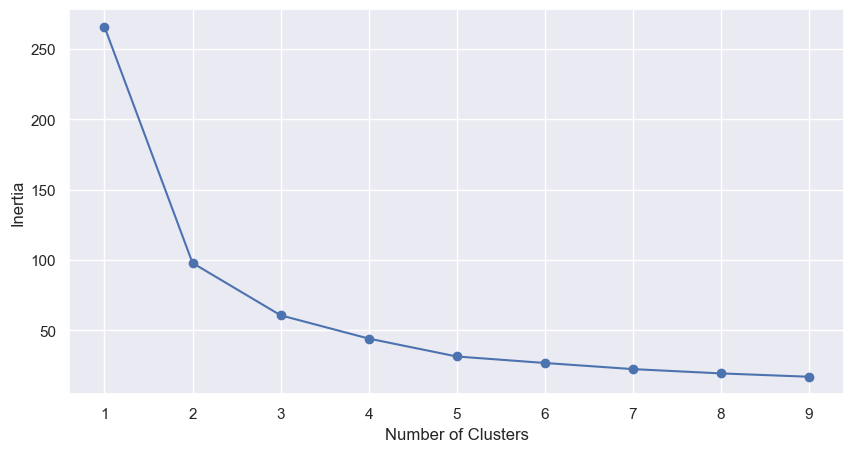

In [55]:

optimise_k_means(life2_num[['BMI_T','ADULT_MORTALITY_T']],10)

In [47]:
kmeans=KMeans(n_clusters=3)

In [56]:
kmeans.fit(life2_num[['BMI_T','ADULT_MORTALITY_T']])

KMeans(n_clusters=3)

In [57]:
life2_num['kmeans_3']=kmeans.labels_

In [58]:
life2_num

,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,POLIO,...,POLIO_T,TOTAL_EXPENDITURE_T,DIPHTHERIA_T,HIV/AIDS_T,GDP_T,POPULATION_T,THINNESS_5_to_19_YEARS_T,INCOME_COMPOSITION_OF_RESOURCES_T,SCHOOLING_T,kmeans_3
0,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.375000,...,-2.054274,1.413675,-1.734171,-0.409694,-0.581398,-0.086628,2.518104,-1.080316,-1.161658,2
1,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.125000,...,1.119938,0.034213,1.060670,-0.409694,-0.377255,-0.320996,-0.801882,0.575819,0.148800,0
2,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.750000,...,0.713192,-0.768050,0.682679,-0.409694,-0.293735,0.208438,0.205264,0.491466,0.340778,0
3,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.125000,...,-2.197831,-1.177466,-2.016709,0.038549,-0.393840,-0.082210,0.296627,-0.838503,-1.217999,2
5,75.15625,106.0000,10.1250,7.966667,773.038981,81.285714,2.0000,54.98125,11.3750,93.375000,...,0.816873,0.612483,0.713224,-0.409694,0.182374,0.169813,-0.950796,1.049603,1.607415,0
6,73.40000,117.3750,1.0000,3.702667,131.007419,87.562500,274.2500,44.70625,1.0000,89.125000,...,0.545709,-0.614170,0.407777,-0.409694,-0.390990,-0.312954,-0.706203,0.511148,0.031944,0
7,81.81250,63.1875,1.0000,10.155333,5332.226473,93.400000,103.9375,55.86250,1.3750,86.750000,...,0.394176,1.762994,0.377232,-0.409694,3.352711,-0.222702,-1.034965,1.746923,2.786410,0
8,81.48125,65.7500,0.0000,12.236000,4928.439188,81.062500,77.2500,48.28750,0.0000,86.000000,...,0.346324,-0.701475,0.369596,-0.409694,3.259790,-0.174999,-0.761596,1.433410,1.233893,0
9,70.73125,115.1875,6.0625,0.992000,131.148747,59.214286,598.1875,43.84375,7.1875,75.812500,...,-0.303672,-0.125024,0.098512,-0.409694,-0.241534,-0.284093,-0.511249,0.535400,-0.114126,0
12,69.30000,141.3750,153.6250,0.010000,32.320972,77.615385,4649.9375,12.87500,201.5625,87.500000,...,0.442029,-1.814114,0.736132,-0.409694,-0.569520,0.747535,2.051220,-0.503902,-1.000981,1


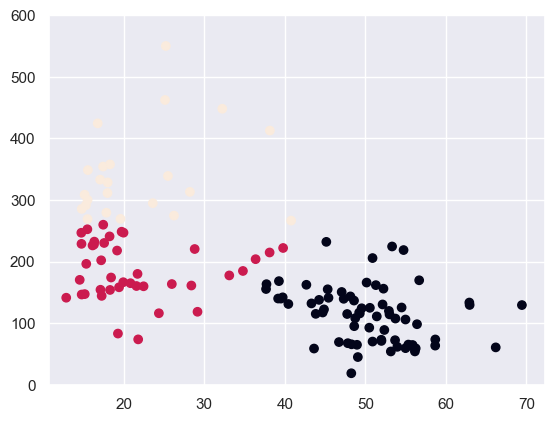

In [65]:
plt.scatter(x=life2_num['BMI'],y=life2_num['ADULT_MORTALITY'],c=life2_num['kmeans_3'])
plt.xlim(10.70)
plt.ylim(0,600)
plt.show()

## Create Multiple Clusters

In [66]:
for k in range(1,6):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(life2_num[['BMI_T','ADULT_MORTALITY_T']])
    life2_num[f'KMeans_{k}']=kmeans.labels_

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [67]:
life2_num

,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,POLIO,...,POPULATION_T,THINNESS_5_to_19_YEARS_T,INCOME_COMPOSITION_OF_RESOURCES_T,SCHOOLING_T,kmeans_3,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
0,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.375000,...,-0.086628,2.518104,-1.080316,-1.161658,2,0,1,0,0,3
1,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.125000,...,-0.320996,-0.801882,0.575819,0.148800,0,0,0,1,3,4
2,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.750000,...,0.208438,0.205264,0.491466,0.340778,0,0,0,1,3,4
3,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.125000,...,-0.082210,0.296627,-0.838503,-1.217999,2,0,1,0,0,3
5,75.15625,106.0000,10.1250,7.966667,773.038981,81.285714,2.0000,54.98125,11.3750,93.375000,...,0.169813,-0.950796,1.049603,1.607415,0,0,0,1,3,4
6,73.40000,117.3750,1.0000,3.702667,131.007419,87.562500,274.2500,44.70625,1.0000,89.125000,...,-0.312954,-0.706203,0.511148,0.031944,0,0,0,1,1,0
7,81.81250,63.1875,1.0000,10.155333,5332.226473,93.400000,103.9375,55.86250,1.3750,86.750000,...,-0.222702,-1.034965,1.746923,2.786410,0,0,0,1,3,4
8,81.48125,65.7500,0.0000,12.236000,4928.439188,81.062500,77.2500,48.28750,0.0000,86.000000,...,-0.174999,-0.761596,1.433410,1.233893,0,0,0,1,3,4
9,70.73125,115.1875,6.0625,0.992000,131.148747,59.214286,598.1875,43.84375,7.1875,75.812500,...,-0.284093,-0.511249,0.535400,-0.114126,0,0,0,1,1,0
12,69.30000,141.3750,153.6250,0.010000,32.320972,77.615385,4649.9375,12.87500,201.5625,87.500000,...,0.747535,2.051220,-0.503902,-1.000981,1,0,1,2,2,1


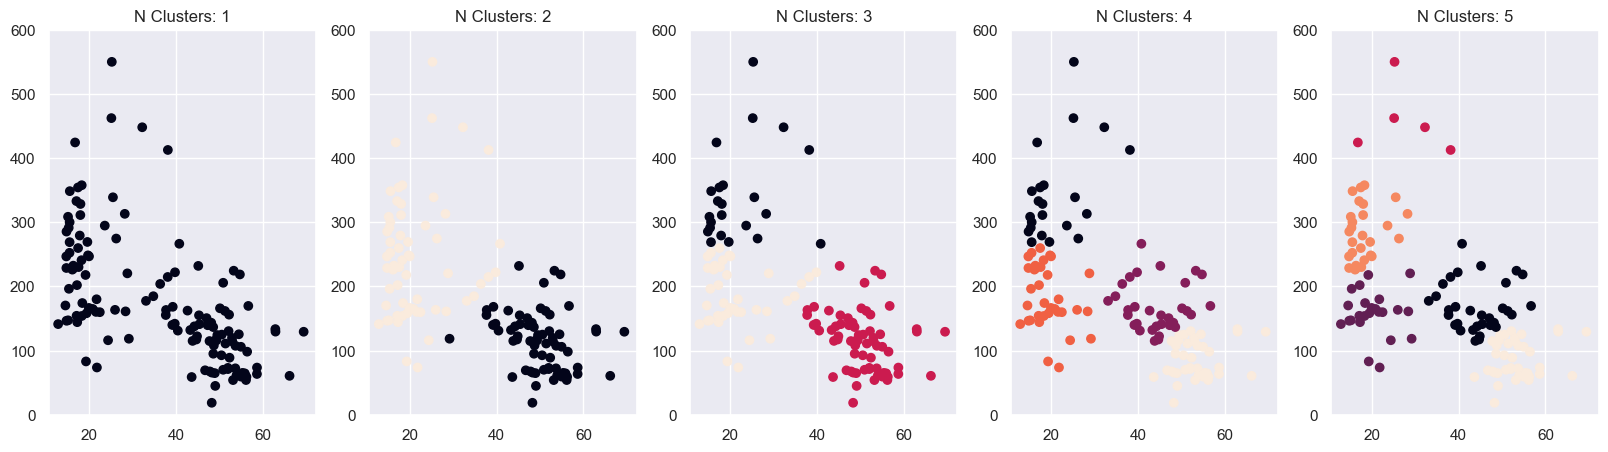

In [70]:
fig,axs=plt.subplots(nrows=1,ncols=5,figsize=(20,5))
for i,ax in enumerate(fig.axes, start=1):
    ax.scatter(x=life2_num['BMI'],y=life2_num['ADULT_MORTALITY'],c=life2_num[f'KMeans_{i}'])
    ax.set_xlim(10.70)
    ax.set_ylim(0,600)
    ax.set_title(f'N Clusters: {i}')